## SZÉKELYDATA Erdők 
### Székelyföldi adatskálázó munkafüzet

In [591]:
import numpy as np, requests, zipfile, StringIO, pandas as pd, json, copy

#suppres warnings
import warnings
warnings.simplefilter(action = "ignore")

In [592]:
import matplotlib.pyplot as plt
%matplotlib inline

Model zip betöltése D3plus formátumra

In [593]:
z = zipfile.ZipFile('../zips2/183.zip')   #romania
ro=json.loads(z.open('data.json').read())

INSSE adatok betöltése - a kódok alapján megkereshetjük a fileokat az insse.ro adatbázisban

In [594]:
df=pd.read_csv('../db/exportPivot_AGR306A.csv')
dfe=pd.read_csv('../db/exportPivot_EXP101J.csv') #exports
dfi=pd.read_csv('../db/exportPivot_EXP102J.csv') #imports

Formázás

In [595]:
dfe=dfe.set_index(['Judete',' Sectiuni si capitole conform Nomenclatorului Combinat (NC)',' Luni'])

Székelyföldi megyék részesedése a romániai fa-exportban

In [596]:
#u' IX. Produse din lemn  exclusiv mobilier', u' X. Hirtie si articole din acestea'
for i in dfe.loc['TOTAL'].loc[' IX. Produse din lemn  exclusiv mobilier'].T:
    print i,'HR',1.0*dfe.loc['Harghita'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare']/\
    dfe.loc['TOTAL'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare'],
    print 'CV',1.0*dfe.loc['Covasna'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare']/\
    dfe.loc['TOTAL'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare'],
    print 'MS',1.0*dfe.loc['Mures'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare']/\
    dfe.loc['TOTAL'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare']

 Luna ianuarie 2011 HR 0.0224271935574 CV 0.00655492087274 MS 0.0333270905515
 Luna februarie 2011 HR 0.0254174397032 CV 0.00856215213358 MS 0.0292764378479
 Luna martie 2011 HR 0.0226030626995 CV 0.00759877244653 MS 0.0313381724295
 Luna aprilie 2011 HR 0.0267161963831 CV 0.00700657540153 MS 0.0240876941319
 Luna mai 2011 HR 0.0307033677439 CV 0.00655078225889 MS 0.0421691933224
 Luna iunie 2011 HR 0.0268270261989 CV 0.00803585108013 MS 0.0258771257852
 Luna iulie 2011 HR 0.0291695937005 CV 0.00733528287399 MS 0.0374524186829
 Luna august 2011 HR 0.0215815556992 CV 0.00483516483516 MS 0.0414565826331
 Luna septembrie 2011 HR 0.0255098426591 CV 0.00680839676031 MS 0.0250297129454
 Luna octombrie 2011 HR 0.0269194810814 CV 0.00546270755584 MS 0.0394906624016
 Luna noiembrie 2011 HR 0.0247022907879 CV 0.0057949399144 MS 0.0322994104076
 Luna decembrie 2011 HR 0.0202294174154 CV 0.00762841159519 MS 0.029317586785
 Luna ianuarie 2012 HR 0.0173826479822 CV 0.00602394261939 MS 0.024767933566

In [597]:
dfi=dfi.set_index(['Judete',' Sectiuni si capitole conform Nomenclatorului Combinat (NC)',' Luni'])

Szkelyföldi megyék részesedése a romániai fa-importban

In [598]:
#u' IX. Produse din lemn  exclusiv mobilier', u' X. Hirtie si articole din acestea'
for i in dfi.loc['TOTAL'].loc[' IX. Produse din lemn  exclusiv mobilier'].T:
    print i,'HR',1.0*dfi.loc['Harghita'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare']/\
    dfi.loc['TOTAL'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare'],
    print 'CV',1.0*dfi.loc['Covasna'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare']/\
    dfi.loc['TOTAL'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare'],
    print 'MS',1.0*dfi.loc['Mures'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare']/\
    dfi.loc['TOTAL'].loc[' IX. Produse din lemn  exclusiv mobilier'].loc[i][' Valoare']

 Luna ianuarie 2011 HR 0.0150882392564 CV 0.00462526381966 MS 0.0258655530109
 Luna februarie 2011 HR 0.00908192734458 CV 0.00581395348837 MS 0.0185058519532
 Luna martie 2011 HR 0.0118738404453 CV 0.00485748018216 MS 0.0129532804857
 Luna aprilie 2011 HR 0.0143393192174 CV 0.00412087912088 MS 0.0169525596355
 Luna mai 2011 HR 0.0183294525046 CV 0.0061794734014 MS 0.0148068541405
 Luna iunie 2011 HR 0.0146931202681 CV 0.00389023550887 MS 0.0188826046623
 Luna iulie 2011 HR 0.0158473383062 CV 0.00281597315838 MS 0.0128815793415
 Luna august 2011 HR 0.0103055555556 CV 0.0035 MS 0.0214444444444
 Luna septembrie 2011 HR 0.0122058196947 CV 0.00446126469335 MS 0.0166169578185
 Luna octombrie 2011 HR 0.0146171758831 CV 0.00325449597396 MS 0.0188255758494
 Luna noiembrie 2011 HR 0.0131207633899 CV 0.00648765019056 MS 0.0224885811538
 Luna decembrie 2011 HR 0.0112385321101 CV 0.00416666666667 MS 0.015252293578
 Luna ianuarie 2012 HR 0.0148837627591 CV 0.00490129951886 MS 0.0161428121768
 Luna f

In [599]:
df=df.set_index(['Categorii de paduri',u' Macroregiuni  regiuni de dezvoltare si judete',u' Ani'])

Szkelyföldi megyék részesedése a romániai fa-kitermelésben

In [600]:
for i in df.loc['Total'].loc[' TOTAL'].T:
    print i,'HR',1.0*df.loc['Total'].loc[' Harghita'].loc[i][' Valoare']/\
    df.loc['Total'].loc[' TOTAL'].loc[i][' Valoare'],
    print 'CV',1.0*df.loc['Total'].loc[' Covasna'].loc[i][' Valoare']/\
    df.loc['Total'].loc[' TOTAL'].loc[i][' Valoare'],
    print 'MS',1.0*df.loc['Total'].loc[' Mures'].loc[i][' Valoare']/\
    df.loc['Total'].loc[' TOTAL'].loc[i][' Valoare']

 Anul 1990 HR 0.0630788635954 CV 0.0285302420566 MS 0.0431377259895
 Anul 1991 HR 0.0564670841706 CV 0.0266955407717 MS 0.0441240546007
 Anul 1992 HR 0.0503491847732 CV 0.0319432982184 MS 0.0414791286678
 Anul 1993 HR 0.0466348311713 CV 0.0302191940077 MS 0.0376948943027
 Anul 1994 HR 0.045201319724 CV 0.0345616244659 MS 0.0339821203669
 Anul 1995 HR 0.0938049765795 CV 0.040578597957 MS 0.0396446748282
 Anul 1996 HR 0.0582978119744 CV 0.0995859031432 MS 0.0384711517027
 Anul 1997 HR 0.0885136299411 CV 0.0796085053589 MS 0.0427266774649
 Anul 1998 HR 0.094249327638 CV 0.0518747033697 MS 0.0415045087803
 Anul 1999 HR 0.0897864864668 CV 0.0362440862802 MS 0.0414197301376
 Anul 2000 HR 0.0792106239543 CV 0.0326713196637 MS 0.0399518365804
 Anul 2001 HR 0.0543462860637 CV 0.0265169310157 MS 0.0464120862322
 Anul 2002 HR 0.0605868242274 CV 0.0216381515098 MS 0.0300797773315
 Anul 2003 HR 0.0602162777462 CV 0.0253602132822 MS 0.0385046281041
 Anul 2004 HR 0.0565562782094 CV 0.0325311290766 MS

Székelyföldi szorzók hozzávetőleges kalibrálása (Maros és Hargita megyék csak részlegesen fekszenek Székelyföld területén)

In [601]:
#szekelyland territory ratios (km2)
#harghita county
hr=6639
#covasna county
cv=3710
#mures county
ms=6714
#szekelyland
szf=12000
hr_mul=0.9
mr_mul=(szf-hr_mul*hr-cv)*1.0/ms
print mr_mul

0.344787012213


Kitermelés, fenyő és lombhullató kategóriákra osztva

In [602]:
df=df.drop(df.columns[0],axis=1)

In [603]:
de=df.unstack(level=1)[' Valoare']

In [604]:
de['szf']=de[' Covasna']+hr_mul*de[' Harghita']+mr_mul*de[' Mures']

In [605]:
exp_c={}
exp_nc={}
for i in de.loc['Total'].T:
    y=int(i[5:])
    exp_c[y]=(1.0*de.loc['Rasinoase'].loc[i]['szf']+\
             1.0*de.loc[u'Diverse specii moi'].loc[i]['szf'])/\
            (de.loc['Rasinoase'].loc[i][' TOTAL']+\
             de.loc[u'Diverse specii moi'].loc[i][' TOTAL'])
    exp_nc[y]=(1.0*de.loc['Stejar'].loc[i]['szf']+\
             1.0*de.loc[u'Fag'].loc[i]['szf']+\
             1.0*de.loc[u'Diverse specii tari'].loc[i]['szf'])/\
            (de.loc['Stejar'].loc[i][' TOTAL']+\
             de.loc['Fag'].loc[i][' TOTAL']+\
             de.loc[u'Diverse specii tari'].loc[i][' TOTAL'])

Export, fa és papír kategóriákra osztva

In [606]:
dfe=dfe.drop(dfe.columns[0],axis=1)

In [607]:
dee=dfe.unstack(level=0)[' Valoare']

In [608]:
dee['szf']=dee['Covasna']+hr_mul*dee['Harghita']+mr_mul*dee['Mures']

In [609]:
#u' IX. Produse din lemn  exclusiv mobilier', u' X. Hirtie si articole din acestea'
exp_nonp={}
exp_pap={}
for i in dee.loc[u' IX. Produse din lemn  exclusiv mobilier'].T:
    y=int(i[-4:])
    if y not in exp_nonp:exp_nonp[y]=0
    exp_nonp[y]+=1.0/12*dee.loc[u' IX. Produse din lemn  exclusiv mobilier'].loc[i]['szf']/\
                    dee.loc[u' IX. Produse din lemn  exclusiv mobilier'].loc[i]['TOTAL']
    if y not in exp_pap:exp_pap[y]=0
    exp_pap[y]+=1.0/12*dee.loc[u' X. Hirtie si articole din acestea'].loc[i]['szf']/\
                    dee.loc[u' X. Hirtie si articole din acestea'].loc[i]['TOTAL']

In [610]:
miny2=min(exp_pap)

Import, fa és papír kategóriákra osztva

In [611]:
dfi=dfi.drop(dfi.columns[0],axis=1)

In [612]:
dei=dfi.unstack(level=0)[' Valoare']

In [613]:
dei['szf']=dei['Covasna']+hr_mul*dei['Harghita']+mr_mul*dei['Mures']

In [614]:
#u' IX. Produse din lemn  exclusiv mobilier', u' X. Hirtie si articole din acestea'
imp_nonp={}
imp_pap={}
for i in dei.loc[u' IX. Produse din lemn  exclusiv mobilier'].T:
    y=int(i[-4:])
    if y not in imp_nonp:imp_nonp[y]=0
    imp_nonp[y]+=1.0/12*dei.loc[u' IX. Produse din lemn  exclusiv mobilier'].loc[i]['szf']/\
                    dei.loc[u' IX. Produse din lemn  exclusiv mobilier'].loc[i]['TOTAL']
    if y not in imp_pap:imp_pap[y]=0
    imp_pap[y]+=1.0/12*dei.loc[u' X. Hirtie si articole din acestea'].loc[i]['szf']/\
                    dei.loc[u' X. Hirtie si articole din acestea'].loc[i]['TOTAL']

In [615]:
miny=min(imp_pap)

In [616]:
s=[]
for i in ro:
    k={}
    k['g']=i['g']
    k['item']=i['item']
    k['year']=i['year']
    k['partner']=i['partner']
    if i['g']=='m':
        if ' (C)' in i['item']:
            k['p']=i['p']*exp_c[i['year']]
            k['s']=i['s']*exp_c[i['year']]
        elif ' (NC)' in i['item']:
            k['p']=i['p']*exp_nc[i['year']]
            k['s']=i['s']*exp_nc[i['year']]
        elif 'News' in i['item']:
            k['p']=i['p']*exp_pap[max(miny2,i['year'])]
            k['s']=i['s']*exp_pap[max(miny2,i['year'])]
        else:
            k['p']=i['p']*exp_nonp[max(miny2,i['year'])]
            k['s']=i['s']*exp_nonp[max(miny2,i['year'])]
    else:
        if 'News' in i['item']:
            k['p']=i['p']*imp_pap[max(miny,i['year'])]
            k['s']=i['s']*imp_pap[max(miny,i['year'])]
        else:
            k['p']=i['p']*imp_nonp[max(miny,i['year'])]
            k['s']=i['s']*imp_nonp[max(miny,i['year'])]
    s.append(k)

Árbecslés

In [617]:
from jupyterthemes import jtplot

# you can select an alternative theme's plot style by name
# oceans16 | grade3 | chesterish | onedork | monokai | solarizedl
jtplot.style('solarized-light')

In [618]:
#arnormalizasa, fenyo, lombhullato es papir szamara
items={'c':{},'nc':{},'pp':{}}
items2={'c':{},'nc':{},'pp':{}}
for i in ro:
    if i['g']=='m': #export
        it='x'
        if '(C)' in i['item']: it='c'
        elif '(NC)' in i['item']: it='nc'
        elif 'News' in i['item']: it='pp'        
        if it!='x':
            if i['year'] not in items[it]: items[it][i['year']]=[]
            if i['p']*i['s']!=0:
                items[it][i['year']].append(i['s']*1.0/i['p'])
    else: #import
        it='x'
        if '(C)' in i['item']: it='c'
        elif '(NC)' in i['item']: it='nc'
        elif 'News' in i['item']: it='pp'        
        if it!='x':
            if i['year'] not in items2[it]: items2[it][i['year']]=[]
            if i['p']*i['s']!=0:
                items2[it][i['year']].append(i['s']*1.0/i['p'])

In [619]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m][data[s<m]>0]

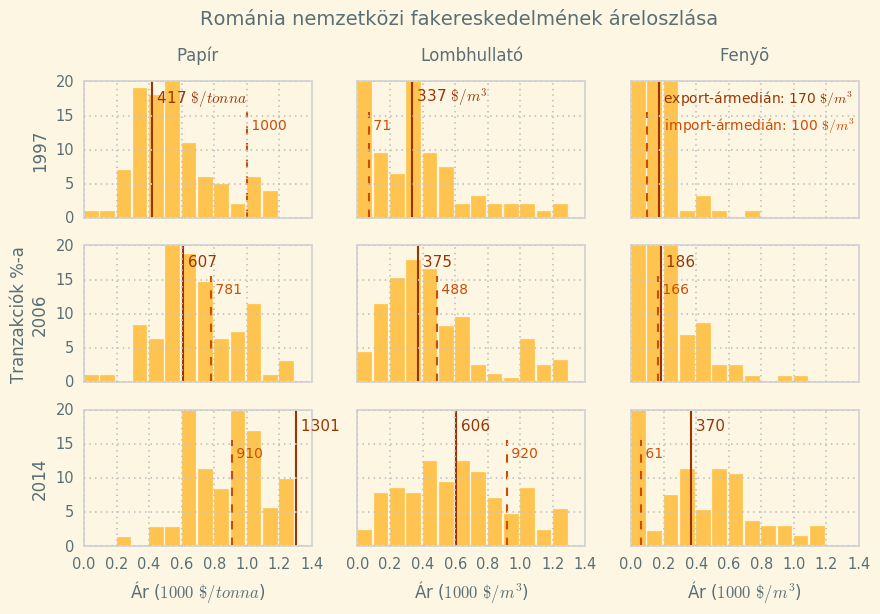

In [620]:
yrs=[1997,2006,2014]
fig,ax=plt.subplots(3,3,figsize=(10,6))
me=1.4
sg=['pp','nc','c']
ti=[u'Papír',u'Lombhullató',u'Fenyõ']
uni=['$\$/tonna$','$\$/m^3$','$\$/m^3$']
for k in range(3):
    for ye in range(len(yrs)):
        year=yrs[ye]
        sq=sg[k]
        mn=np.median(reject_outliers(np.array(items[sq][year])))
        hs=np.histogram(items[sq][year]+items2[sq][year],bins=np.arange(0,me,0.1))
        ze=list(hs[0]*100.0/sum(hs[0]))+[0]
        ax[ye][k].bar(hs[1],ze,0.09,color='#fec44f')
        ax[ye][k].plot([mn,mn],[0,20],color='#993404')
        ax[ye][k].set_ylim(0,20)
        ax[ye][k].set_xlim(0,me)
        if k==2 and ye==0:
            ax[ye][k].text(mn,17,u' export-ármedián: '+str(int(mn*1000))+' '+uni[k],color='#993404',size=10)
        elif ye==0:
            ax[ye][k].text(mn,17,u' '+str(int(mn*1000))+' '+uni[k],color='#993404')
        else:
            ax[ye][k].text(mn,17,u' '+str(int(mn*1000+1)),color='#993404')
        if k!=0: 
            ax[ye][k].set_yticklabels([])
        if ye!=2: 
            ax[ye][k].set_xticklabels([])
        else:    
            ax[ye][k].set_xlabel(u'Ár ('+uni[k]+')')
        if k==0:
            if ye==1: 
                ax[ye][k].set_ylabel(u'Áreloszlás (%)\n'+str(year))
            else:
                ax[ye][k].set_ylabel(str(year))
        if ye==0: 
            ax[ye][k].set_title(ti[k],y=1.1)
        
        mn=np.median(reject_outliers(np.array(items2[sq][year])))
        hs=np.histogram(items2[sq][year],bins=np.arange(0,me,0.1))
        ze=list(hs[0]*100.0/sum(hs[0]))+[0]
        #ax[ye][k].bar(hs[1],ze,0.09,color='#cc4c02')
        ax[ye][k].plot([mn,mn],[0,15.5],color='#cc4c02',ls='--')
        ax[ye][k].set_ylim(0,20)
        ax[ye][k].set_xlim(0,me)
        if k==2 and ye==0:
            ax[ye][k].text(mn,13,u'    import-ármedián: '+str(int(mn*1000))+' '+uni[k],color='#cc4c02',size=10)
        else:
            ax[ye][k].text(mn,13,u' '+str(int(mn*1000)),color='#cc4c02',size=10)
        if k!=0: 
            ax[ye][k].set_yticklabels([])
        if ye!=2: 
            ax[ye][k].set_xticklabels([])
        else:    
            ax[ye][k].set_xlabel(u'Ár ('+'$1000$ '+uni[k]+')')
        if k==0:
            if ye==1: 
                ax[ye][k].set_ylabel(u'Tranzakciók %-a\n'+str(year))
            else:
                ax[ye][k].set_ylabel(str(year))
        if ye==0: 
            ax[ye][k].set_title(ti[k],y=1.1)
        plt.suptitle(u'Románia nemzetközi fakereskedelmének áreloszlása',y=1.02,fontsize=14)

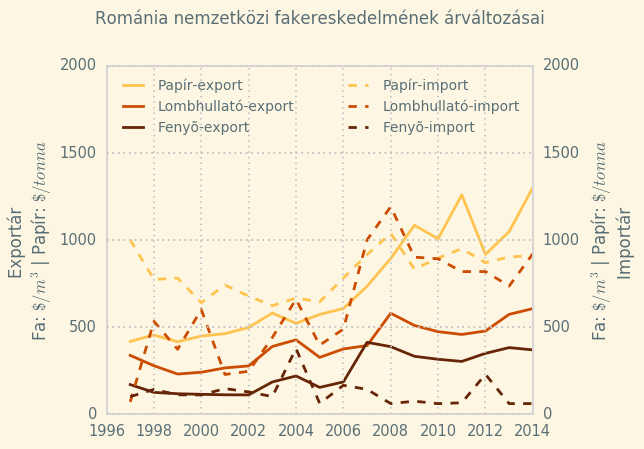

In [621]:
colors=['#fec44f','#cc4c02','#662506']
for k in range(3):
    sq=sg[k]
    x=[]
    y=[]
    for i in np.sort(items[sq].keys()):
        x.append(i) 
        mn=np.median(reject_outliers(np.array(items[sq][i])))
        y.append(mn*1000)
    plt.plot(x,y,label=ti[k]+'-export',c=colors[k],lw=2)
plt.legend(loc=2,framealpha=0,fontsize=10)
plt.ylabel(u'Exportár '+'\nFa: $\$/m^3$ | '+u'Papír: '+'$\$/tonna$ ')
plt.ylim(0,2000)
ax=plt.gca().twinx()
for k in range(3):
    sq=sg[k]
    x=[]
    y=[]
    for i in np.sort(items2[sq].keys()):
        x.append(i) 
        mn=np.median(reject_outliers(np.array(items2[sq][i])))
        y.append(mn*1000)
    ax.plot(x,y,label=ti[k]+'-import',ls='--',c=colors[k],lw=2)
    ax.set_ylim(0,2000)
ax.legend(loc=1,framealpha=0,fontsize=10)
ax.set_ylabel('Fa: $\$/m^3$ | '+u'Papír: '+'$\$/tonna$ '+u'\nImportár ')
plt.title(u'Románia nemzetközi fakereskedelmének árváltozásai',y=1.1)
plt.show()

In [622]:
#methid 2
q=[]
for i in ro:
    k={}
    k['g']=i['g']
    k['item']=i['item']
    k['year']=i['year']
    k['partner']=i['partner']
    if i['g']=='m':
        if ' (C)' in i['item']:
            k['p']=i['p']*exp_c[i['year']]
            k['s']=i['p']*exp_c[i['year']]*np.median(reject_outliers(np.array(items['c'][i['year']])))
        elif ' (NC)' in i['item']:
            k['p']=i['p']*exp_nc[i['year']]
            k['s']=i['p']*exp_nc[i['year']]*np.median(reject_outliers(np.array(items['nc'][i['year']])))
        elif 'News' in i['item']:
            k['p']=i['p']*exp_pap[max(miny2,i['year'])]
            k['s']=i['p']*exp_pap[max(miny2,i['year'])]*np.median(reject_outliers(np.array(items['pp'][i['year']])))
        else:
            k['p']=i['p']*exp_nonp[max(miny2,i['year'])]
            k['s']=i['p']*exp_nonp[max(miny2,i['year'])]*np.median(reject_outliers(np.array(items['pp'][i['year']]+\
                                                                  items['nc'][i['year']]+\
                                                                  items['c'][i['year']])))
    else:
        if 'News' in i['item']:
            k['p']=i['p']*imp_pap[max(miny,i['year'])]
            k['s']=i['p']*imp_pap[max(miny,i['year'])]*np.median(reject_outliers(np.array(items2['pp'][i['year']])))
        else:
            k['p']=i['p']*imp_nonp[max(miny,i['year'])]
            k['s']=i['p']*imp_nonp[max(miny,i['year'])]*np.median(reject_outliers(np.array(items2['c'][i['year']]+\
                                                                 items2['nc'][i['year']])))
    q.append(k)

Globális JSON könyvtárak frissítése

In [623]:
try:
    import zlib
    compression = zipfile.ZIP_DEFLATED
except:
    compression = zipfile.ZIP_STORED

In [624]:
file('dummy.json','w').write(json.dumps(s)) 
zf = zipfile.ZipFile('../zips2/999.zip', mode='w')
zf.write('dummy.json','data.json',compress_type=compression)
zf.close()
file('dummy.json','w').write(json.dumps(q)) 
zf = zipfile.ZipFile('../zips2/899.zip', mode='w')
zf.write('dummy.json','data.json',compress_type=compression)
zf.close()

In [625]:
c=json.loads(file('../json/countries2.json').read())
if u'Székelyföld (skálázott)' not in c:
    c.append(u'Székelyföld (skálázott)')
if u'Székelyföld (becsült)' not in c:
    c.append(u'Székelyföld (becsült)')
file('../json/countries3.json','w').write(json.dumps(c)) 

In [626]:
d=json.loads(file('../json/cdict2.json').read())
d[u'Székelyföld (skálázott)']=999
d[u'999']=u'Székelyföld (skálázott)'
d[u'Székelyföld (becsült)']=899
d[u'899']=u'Székelyföld (becsült)'
file('../json/cdict3.json','w').write(json.dumps(d)) 

In [627]:
e=json.loads(file('../json/hnames.json').read())
e[u'Székelyföld (skálázott)']=u'Székelyföld (skálázott)'
e[u'Székelyföld (becsült)']=u'Székelyföld (becsült)'
file('../json/hnames3.json','w').write(json.dumps(e)) 

In [628]:
file('../json/szf.json','w').write(json.dumps(s)) 

In [629]:
file('../json/items.json','w').write(json.dumps(items)) 
file('../json/items2.json','w').write(json.dumps(items2)) 

Grafikon

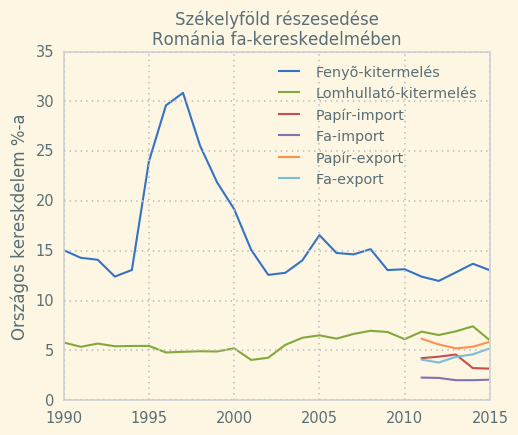

In [630]:
x=[]
y=[]
for i in np.sort(exp_c.keys()):
    x.append(i)
    y.append(exp_c[i]*100)
plt.plot(x,y,label=u'Fenyõ-kitermelés')
x=[]
y=[]
for i in np.sort(exp_nc.keys()):
    x.append(i)
    y.append(exp_nc[i]*100)
plt.plot(x,y,label=u'Lomhullató-kitermelés')
x=[]
y=[]
for i in np.sort(imp_pap.keys()):
    x.append(i)
    y.append(imp_pap[i]*100)
plt.plot(x,y,label=u'Papír-import')
x=[]
y=[]
for i in np.sort(imp_nonp.keys()):
    x.append(i)
    y.append(imp_nonp[i]*100)
plt.plot(x,y,label=u'Fa-import')
x=[]
y=[]
for i in np.sort(exp_pap.keys()):
    x.append(i)
    y.append(exp_pap[i]*100)
plt.plot(x,y,label=u'Papír-export')
x=[]
y=[]
for i in np.sort(exp_nonp.keys()):
    x.append(i)
    y.append(exp_nonp[i]*100)
plt.plot(x,y,label=u'Fa-export')
plt.xlim(1990,2015)
plt.ylabel(u'Országos kereskdelem %-a')
plt.legend(framealpha=0,fontsize=10.4)
plt.title(u'Székelyföld részesedése\nRománia fa-kereskedelmében')